In [2]:
import numpy as np
import os
# from skimage.measure import block_reduce
from scipy.misc import imread
import cPickle as pkl
import scipy.signal
import numpy.fft as fft
import sys
import optparse
from libtiff import TIFF
from PIL import Image
import re
import itertools
from scipy import ndimage
import pandas as pd
import matplotlib.pyplot as plt

import math
%matplotlib inline


def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

ImportError: dlopen(/Users/julianarhee/anaconda/envs/retinodev/lib/python2.7/site-packages/matplotlib/_png.so, 2): Library not loaded: @loader_path/../../../libpng15.15.dylib
  Referenced from: /Users/julianarhee/anaconda/envs/retinodev/lib/python2.7/site-packages/matplotlib/_png.so
  Reason: image not found

In [3]:
# outdir = '/media/juliana/MAC/data/JR009/20150625/20150625_JR009_500um_0050Hz/structs'
# outdir = '/media/nas/volume1/widefield/data/JR009/20150625/20150625_JR009_500um_0050Hz/structs'
outdir = '/Volumes/MAC/data/JR009/20150625/20150625_JR009_500um_0050Hz/structs'

# outdir = '/media/nas/volume1/widefield/data/JR001B/20160502/JR001B_bar_005Hz/structs'
# outdir = '/media/nas/volume1/widefield/data/JR009/20150709/20150709_JR009_500um_05Hz_nored/structs' #V-Left ok


# outdir = '/media/juliana/MAC/data/JR009/20150709/20150709_JR009_500um_05Hz/structs'
# outdir = '/media/juliana/MAC/data/JR009/20150709/20150709_JR009_500um_05Hz_nored/structs' #V-Left ok
# outdir = '/media/juliana/MAC/data/JR009/20150625/test'


In [6]:
rundir = os.path.split(outdir)[0]
sessiondir = os.path.split(rundir)[0]
reduceit=0

In [7]:
#################################################################################
# GET BLOOD VESSEL IMAGE:
#################################################################################
folders = os.listdir(rundir)
figpath = [f for f in folders if f == 'figures']
print rundir

if figpath:
    figdir = figpath[0]
    tmp_ims = os.listdir(os.path.join(sessiondir, figdir))
    surface_words = ['surface', 'GREEN', 'green', 'Surface']
    ims = [i for i in tmp_ims if any([word in i for word in surface_words])]
    print ims
    impath = os.path.join(rusessiondirndir, figdir, ims[0])
    # image = Image.open(impath) #.convert('L')
    # imarray = np.asarray(image)
    print os.path.splitext(impath)[1]
    if os.path.splitext(impath)[1] == '.tif':
        tiff = TIFF.open(impath, mode='r')
        surface = tiff.read_image().astype('float')
        tiff.close()
        plt.imshow(surface)
    else:
        image = Image.open(impath) #.convert('L')
        surface = np.asarray(image)


else: # NO BLOOD VESSEL IMAGE...
    surface = np.zeros([200,300])

if reduceit:
    surface = block_reduce(surface, reduce_factor, func=np.mean)

plt.imshow(surface, cmap='gray')

/Volumes/MAC/data/JR009/20150625/20150625_JR009_500um_0050Hz
[]


IndexError: list index out of range

In [420]:

files = os.listdir(outdir)
files = [f for f in files if os.path.splitext(f)[1] == '.pkl']

# dstructs = [f for f in files if 'D_target_FFT' in f and str(reduce_factor) in f]
# if not dstructs:
#     dstructs = [f for f in files if 'D_' in f and str(reduce_factor) in f] # address older analysis formats
# print dstructs

# MEAN-SUBTRACTED ANALYSIS:
dstructs = [f for f in files if 'Target_fft_' in f]
# print "found structs: ", dstructs

D = dict()
for f in dstructs:
    outfile = os.path.join(outdir, f)
    with open(outfile,'rb') as fp:
        D[f] = pkl.load(fp)
print D.keys()

['Target_fft_H-Up_00_(2, 2)_nas.pkl', 'Target_fft_H-Down_0_(2, 2)_nas.pkl', 'Target_fft_H-Up_0_(2, 2)_nas.pkl', 'Target_fft_V-Left_(2, 2)_.pkl', 'Target_fft_V-Right_0_(2, 2)_nas.pkl', 'Target_fft_H-Down_(2, 2)_.pkl', 'Target_fft_V-Left_0_(2, 2)_nas.pkl', 'Target_fft_H-Up_(2, 2)_.pkl', 'Target_fft_V-Right_(2, 2)_.pkl']


In [421]:
# ------------------------------------
# Get specific runs:
# ------------------------------------
# run_num = str(0)
# reduce_factor = (2, 2)
# append = 'nas'

# ------------------------------------
# Assign corresponding AZ and EL keys:
# ------------------------------------

topkeys = [k for k in D.keys() if 'Down' in k or 'Top' in k] #[0]
bottomkeys = [k for k in D.keys() if 'Up' in k or 'Bottom' in k] #[0]

leftkeys = [k for k in D.keys() if 'Left' in k] #[0]
rightkeys = [k for k in D.keys() if 'Right' in k] #[0]

el_keys = [topkeys, bottomkeys]
az_keys = [leftkeys, rightkeys]

print "AZ keys: ", az_keys
print "EL keys: ", el_keys

# curr_keys = [leftkey, rightkey, topkey, bottomkey]


AZ keys:  [['Target_fft_V-Left_(2, 2)_.pkl', 'Target_fft_V-Left_0_(2, 2)_nas.pkl'], ['Target_fft_V-Right_0_(2, 2)_nas.pkl', 'Target_fft_V-Right_(2, 2)_.pkl']]
EL keys:  [['Target_fft_H-Down_0_(2, 2)_nas.pkl', 'Target_fft_H-Down_(2, 2)_.pkl'], ['Target_fft_H-Up_00_(2, 2)_nas.pkl', 'Target_fft_H-Up_0_(2, 2)_nas.pkl', 'Target_fft_H-Up_(2, 2)_.pkl']]


Curr key is:  Target_fft_V-Left_0_(2, 2)_nas.pkl
Showing:  Target_fft_V-Left_0_(2, 2)_nas.pkl
/media/nas/volume1/widefield/data/JR009/20150625/20150625_JR009_500um_0050Hz/figures/Target_fft_V-Left_0_(2, 2)_nas.pkl.jpg


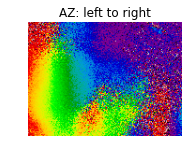

In [422]:
######################################################################
# V-LEFT:
######################################################################

run_num = '0'
reduce_factor = (2, 2)
append = 'nas'
cond_type = 'Left'

run_conds = [cond_type, str(run_num)+'_', str(reduce_factor), append]
tmp_keys = [k for k in leftkeys if all([c in k for c in run_conds])] #[0]
if len(tmp_keys) > 1:
    print "More than 1 match found: "
    print tmp_keys
elif tmp_keys == []:
    print "No matches found from list: "
    print leftkeys
else:
    leftkey = tmp_keys[0]
    print "Curr key is: ", leftkey

leftmap = D[leftkey]['ft']

currkey = leftkey
currmap = leftmap

print "Showing: ", currkey

fig = plt.figure()

# fig.add_subplot(1,2,1)
# plt.imshow(np.angle(currmap), cmap='spectral') #, vmin=-1*math.pi, vmax=1*math.pi)
# plt.title('AZ: left to right')
# plt.axis('off')

# ax = fig.add_subplot(1,2,2)
# plt.imshow(V_left_legend, cmap='spectral')
# plt.axis('off')


fig.add_subplot(1,2,1)
plt.imshow(surface, cmap='gray')
plt.axis('off')


plt.imshow(np.angle(currmap), cmap='spectral') #, vmin=-1*math.pi, vmax=1*math.pi)
plt.title('AZ: left to right')
plt.axis('off')


# imname = 'CCW_phase_overlay_withkey'
impath = os.path.join(os.path.split(outdir)[0], "figures", currkey+'.svg')
plt.savefig(impath, format='svg', dpi=1200)

impath = os.path.join(os.path.split(outdir)[0], "figures", currkey+'.jpg')
plt.savefig(impath, format='jpg')

print impath

Curr key is:  Target_fft_V-Right_0_(2, 2)_nas.pkl
Showing:  Target_fft_V-Right_0_(2, 2)_nas.pkl
/media/nas/volume1/widefield/data/JR009/20150625/20150625_JR009_500um_0050Hz/figures/Target_fft_V-Right_0_(2, 2)_nas.pkl.jpg


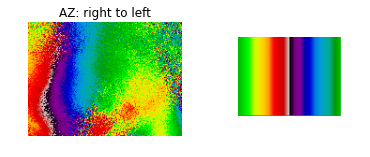

In [423]:
######################################################################
# V-RIGHT:
######################################################################

run_num = 0
reduce_factor = (2, 2)
append = 'nas'
cond_type = 'Right'

run_conds = [cond_type, str(run_num)+'_', str(reduce_factor), append]
tmp_keys = [k for k in rightkeys if all([c in k for c in run_conds])] #[0]
if len(tmp_keys) > 1:
    print "More than 1 match found: "
    print tmp_keys
elif tmp_keys == []:
    print "No matches found from list: "
    print rightkeys
else:
    rightkey = tmp_keys[0]
    print "Curr key is: ", rightkey

rightmap = D[rightkey]['ft']

currkey = rightkey
currmap = rightmap

print "Showing: ", currkey

fig = plt.figure()

fig.add_subplot(1,2,1)
plt.imshow(np.angle(currmap), cmap='spectral') #, vmin=-1*math.pi, vmax=1*math.pi)
plt.title('AZ: right to left')
plt.axis('off')

ax = fig.add_subplot(1,2,2)
plt.imshow(V_right_legend, cmap='spectral')
plt.axis('off')


impath = os.path.join(os.path.split(outdir)[0], "figures", currkey+'.svg')
plt.savefig(impath, format='svg', dpi=1200)

impath = os.path.join(os.path.split(outdir)[0], "figures", currkey+'.jpg')
plt.savefig(impath, format='jpg')

print impath

['Target_fft_H-Down_0_(2, 2)_nas.pkl', 'Target_fft_H-Down_(2, 2)_.pkl']
Curr key is:  Target_fft_H-Down_0_(2, 2)_nas.pkl
Showing:  Target_fft_H-Down_0_(2, 2)_nas.pkl
/media/nas/volume1/widefield/data/JR009/20150625/20150625_JR009_500um_0050Hz/figures/Target_fft_H-Down_0_(2, 2)_nas.pkl.jpg


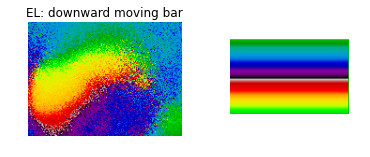

In [424]:
######################################################################
# H-TOP:  DOWN-ward moving bar...
######################################################################


run_num = 0
reduce_factor = (2, 2)
append = 'nas'
# cond_type = 'Top'
cond_type = 'Down'
print topkeys

run_conds = [cond_type, str(run_num)+'_', str(reduce_factor), append]
tmp_keys = [k for k in topkeys if all([c in k for c in run_conds])] #[0]
if len(tmp_keys) > 1:
    print "More than 1 match found: "
    print tmp_keys
elif tmp_keys == []:
    print "No matches found from list: "
    print topkeys
else:
    topkey = tmp_keys[0]
    print "Curr key is: ", topkey

topmap = D[topkey]['ft']

currkey = topkey
currmap = topmap

print "Showing: ", currkey


fig = plt.figure()

fig.add_subplot(1,2,1)
plt.imshow(np.angle(currmap), cmap='spectral',  vmin=-1*math.pi, vmax=1*math.pi)
plt.title('EL: downward moving bar')
plt.axis('off')

ax = fig.add_subplot(1,2,2)
plt.imshow(H_down_legend, cmap='spectral')
plt.axis('off')


impath = os.path.join(os.path.split(outdir)[0], "figures", currkey+'.svg')
plt.savefig(impath, format='svg', dpi=1200)

impath = os.path.join(os.path.split(outdir)[0], "figures", currkey+'.jpg')
plt.savefig(impath, format='jpg')

print impath

Curr key is:  Target_fft_H-Up_00_(2, 2)_nas.pkl
Showing:  Target_fft_H-Up_00_(2, 2)_nas.pkl
/media/nas/volume1/widefield/data/JR009/20150625/20150625_JR009_500um_0050Hz/figures/Target_fft_H-Up_00_(2, 2)_nas.pkl.jpg


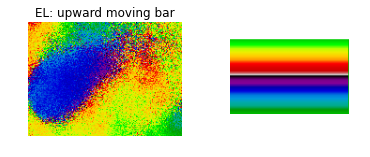

In [426]:
######################################################################
# H-BOTTOM:  UP-ward moving bar...
######################################################################

run_num = "00"
reduce_factor = (2, 2)
append = 'nas'
# cond_type = 'Bottom' # 'Up'
cond_type = 'Up'


run_conds = [cond_type, '_'+str(run_num)+'_', str(reduce_factor), append]
tmp_keys = [k for k in bottomkeys if all([c in k for c in run_conds])] #[0]
if len(tmp_keys) > 1:
    print "More than 1 match found: "
    print tmp_keys
elif tmp_keys == []:
    print "No matches found from list: "
    print bottomkeys
else:
    bottomkey = tmp_keys[0]
    print "Curr key is: ", bottomkey

bottommap = D[bottomkey]['ft']

currkey = bottomkey
currmap = bottommap

print "Showing: ", currkey
fig = plt.figure()

fig.add_subplot(1,2,1)
plt.imshow(np.angle(currmap), cmap='spectral',  vmin=-1*math.pi, vmax=1*math.pi)
plt.title('EL: upward moving bar')
plt.axis('off')

ax = fig.add_subplot(1,2,2)
plt.imshow(H_up_legend, cmap='spectral')
plt.axis('off')


impath = os.path.join(os.path.split(outdir)[0], "figures", currkey+'.svg')
plt.savefig(impath, format='svg', dpi=1200)

impath = os.path.join(os.path.split(outdir)[0], "figures", currkey+'.jpg')
plt.savefig(impath, format='jpg')

print impath

-1.57079632679 1.57079632679


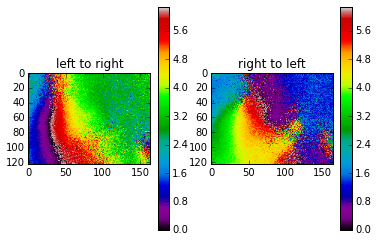

In [368]:
import cmath

phase_left = np.zeros(leftmap.shape)
phase_right = np.zeros(rightmap.shape)

x = 100
y = 100
p = cmath.phase(leftmap[x][y])

print cmath.phase(-1j), math.pi/2.

for x in range(leftmap.shape[0]):
    for y in range(leftmap.shape[1]):
        c_l = cmath.phase(leftmap[x][y])
        c_r = cmath.phase(rightmap[x][y])
        if c_l < 0:
            phase_left[x, y] = c_l + 2*math.pi
        else:
            phase_left[x, y] = c_l
        
        if c_r < 0:
            phase_right[x, y] = c_r + 2*math.pi
        else:
            phase_right[x, y] = c_r

# for x in range(phase_left.shape[0]):
#     for y in range(phase_left.shape[1]):
#         if phase_left[x,y] < 0:
#             phase_left[x,y] += 2*math.pi

# for x in range(phase_right.shape[0]):
#     for y in range(phase_right.shape[1]):
#         if phase_right[x,y] < 0:
#             phase_right[x,y] += 2*math.pi

# c = leftmap[50,50]
# print cmath.phase(c)
# if cmath.phase(c) < 0:
#     shift = cmath.rect(0, -1*2*math.pi)
#     c = c + shift
#     print cmath.phase(c)

plt.subplot(1,2,1)
plt.imshow(phase_left, cmap='spectral')
plt.colorbar()
plt.title("left to right")

plt.subplot(1,2,2)
plt.imshow(phase_right, cmap='spectral')
plt.colorbar()
plt.title('right to left')

<matplotlib.colorbar.Colorbar instance at 0x7f6e7a01cdd0>

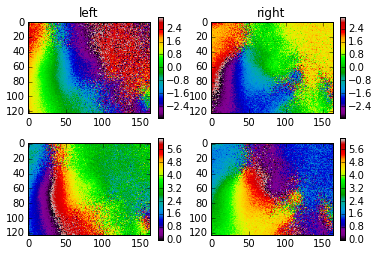

In [369]:
# SWAP NEGATIVES.

import math
phase_left = np.angle(leftmap)
phase_right = np.angle(rightmap)

for x in range(phase_left.shape[0]):
    for y in range(phase_left.shape[1]):
        if phase_left[x,y] < 0:
            phase_left[x,y] += 2*math.pi

for x in range(phase_right.shape[0]):
    for y in range(phase_right.shape[1]):
        if phase_right[x,y] < 0:
            phase_right[x,y] += 2*math.pi


plt.subplot(2,2,1)
plt.imshow(np.angle(leftmap), cmap='spectral') #, vmin=-1*math.pi, vmax=1*math.pi)
plt.colorbar()
plt.title('left')

plt.subplot(2,2,2)
plt.imshow(np.angle(rightmap), cmap='spectral') #, vmin=-1*math.pi, vmax=1*math.pi)
plt.colorbar()
plt.title('right')

plt.subplot(2,2,3)
plt.imshow(phase_left, cmap='spectral') #, vmin=-1*math.pi, vmax=1*math.pi)
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(phase_right, cmap='spectral') #, vmin=-1*math.pi, vmax=1*math.pi)
plt.colorbar()


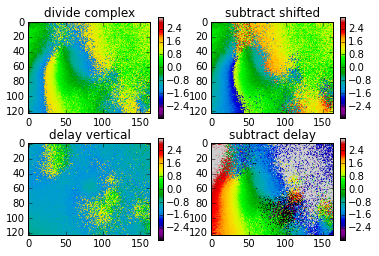

In [370]:
# AZ = (phase_left - phase_right) #* 0.5

plt.subplot(2,2,1)
AZ = np.angle( leftmap / rightmap ) * 0.5 #/ 2.
plt.imshow(AZ, cmap='spectral', vmin=-1*math.pi, vmax = math.pi)
plt.colorbar()
plt.title('divide complex')

plt.subplot(2,2,2)
AZ = (phase_left - phase_right) * 0.5
plt.imshow(AZ, cmap='spectral', vmin=-1*math.pi, vmax = math.pi)
plt.colorbar()
plt.title('subtract shifted')

plt.subplot(2,2,3)
delay_az = np.angle( leftmap * rightmap) / 2.
# delay_az = np.angle( rightmap * leftmap) / 2.
plt.imshow(delay_az, cmap='spectral', vmin=-1*math.pi, vmax = math.pi)
plt.colorbar()
plt.title('delay vertical')

plt.subplot(2,2,4)
delay_sub = np.angle(leftmap) - delay_az
# delay_sub = np.angle(rightmap.conjugate()) - delay_az

plt.imshow(delay_sub, cmap='spectral', vmin=-1*math.pi, vmax = math.pi)
plt.colorbar()
plt.title('subtract delay')

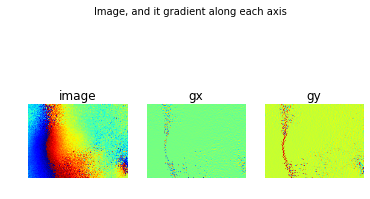

In [357]:
# CHECK GRADIENT

p= phase_left #phase_right#phase_left
# p = np.angle(rightmap) 

# plt.imshow(p)
gx, gy = np.gradient(p)
# print "gx =", gx
# print "gy =", gy

# plotting
plt.close("all")
plt.figure()
plt.suptitle("Image, and it gradient along each axis")
ax = plt.subplot("131")
ax.axis("off")
ax.imshow(p)
ax.set_title("image")

ax = plt.subplot("132")
ax.axis("off")
ax.imshow(gx)
ax.set_title("gx")

ax = plt.subplot("133")
ax.axis("off")
ax.imshow(gy)
ax.set_title("gy")
plt.show()


(-0.5, 163.5, 122.5, -0.5)

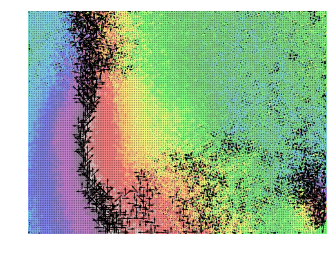

In [358]:
# PLOT VECTOR FIELD

from pylab import *
Q = quiver(gx, gy)

# l,r,b,t = axis()
# dx, dy = r-l, t-b
# axis([l-0.05*dx, r+0.05*dx, b-0.05*dy, t+0.05*dy])

plt.imshow(p, cmap='spectral', alpha=0.5)
plt.axis('off')

-4.6840221463778162

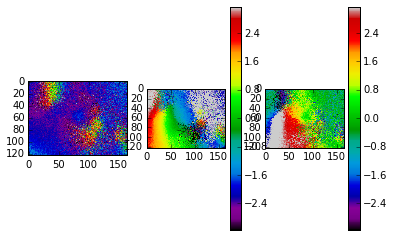

In [347]:
# Use DELAY MAP to shift relative maps.

# delay = (phase_left + phase_right) / 2.
delay = np.angle(leftmap * rightmap) / 2.

# az = (phase_left - phase_right) / 2.
# az = phase_left - delay
az = np.angle(leftmap) - delay

shiftright = np.angle(rightmap.conjugate()) - delay

# plt.imshow(az, cmap='jet', vmin=-1*math.pi, vmax=1*math.pi)
plt.subplot(1,3,1)
plt.imshow(delay, cmap='spectral')

plt.subplot(1,3,2)
plt.imshow(az, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.colorbar()

plt.subplot(1,3,3)
plt.imshow(shiftright, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.colorbar()

# plt.colorbar()
# x = np.where(phase_left<0)
# len(x[1])
# phase_left.max()
az.min()

-3.1116596415479836

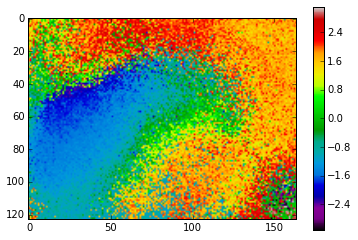

In [348]:
import math
phase_top = np.angle(topmap)
phase_bottom = np.angle(bottommap)

for x in range(phase_top.shape[0]):
    for y in range(phase_top.shape[1]):
        if phase_top[x,y] < 0:
            phase_top[x,y] += 2*math.pi

for x in range(phase_bottom.shape[0]):
    for y in range(phase_bottom.shape[1]):
        if phase_bottom[x,y] < 0:
            phase_bottom[x,y] += 2*math.pi

        
el = (phase_top - phase_bottom) / 2.
# plt.imshow(az, cmap='spectral') #, vmin=-1*math.pi, vmax=1*math.pi)
plt.imshow(el, cmap='spectral') #, vmin=0, vmax=2*math.pi)
plt.colorbar()
# plt.colorbar()
# x = np.where(phase_left<0)
# len(x[1])
# phase_left.max()
el.min()

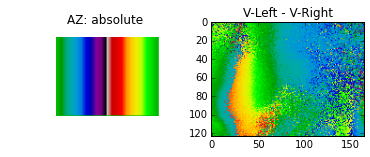

In [282]:
######################################################################
# ABSOLUTE AZIMUTH
######################################################################
# For LEFTMAP - RIGHTMAP, color legend follows LEFT-only map direction:

azimuth_phase = ( np.angle(leftmap) - np.angle(rightmap) ) / 2.

# SEE ABOVE COLORBAR
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
plt.imshow(V_left_legend, cmap='spectral')
# ax.axes.get_xaxis().set_visible(False)
# ax.axes.get_yaxis().set_visible(False)
plt.axis('off')

plt.title('AZ: absolute')
fig.add_subplot(1,2,2)
plt.imshow(azimuth_phase, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('V-Left - V-Right')

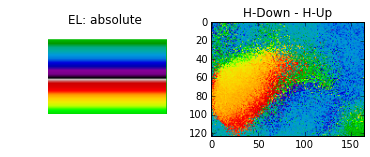

In [283]:
######################################################################
# ABSOLUTE ELEVATION
######################################################################

elevation_phase = ( np.angle(topmap) - np.angle(bottommap) ) / 2.

fig = plt.figure()
ax = fig.add_subplot(1,2,1)
plt.imshow(H_down_legend, cmap='spectral')
# ax.axes.get_xaxis().set_visible(False)
# ax.axes.get_yaxis().set_visible(False)
plt.axis('off')

plt.title('EL: absolute')
fig.add_subplot(1,2,2)
plt.imshow(elevation_phase, cmap='spectral',  vmin=-1*math.pi, vmax=1*math.pi)
plt.title('H-Down - H-Up')

(-0.5, 431.5, 287.5, -0.5)

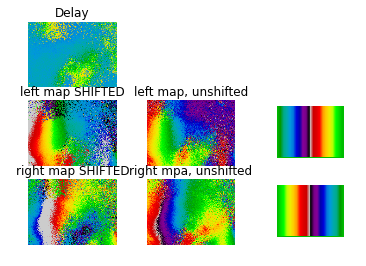

In [284]:
######################################################################
# DELAY VERT:
######################################################################

fig = plt.figure()

# fig.add_subplot(1,3,1)
# # delay_vert = (np.angle(leftmap) + np.angle(rightmap))
# delay_vert = np.angle(leftmap * rightmap) / 2
# plt.imshow(delay_vert, cmap='spectral',  vmin=-1*math.pi, vmax=1*math.pi)
# # plt.colorbar()
# plt.title("Delay")

# fig.add_subplot(1,3,2)
# shift_left = np.angle(leftmap.conjugate()) - delay_vert
# plt.imshow(shift_left, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
# plt.title('Shift LEFT')


# fig.add_subplot(1,3,3)
# shift_left = np.angle(rightmap.conjugate()) + delay_vert
# plt.imshow(shift_left, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
# plt.title('Shift RIGHT')

colormap = 'spectral'

# 1. Delay map
fig.add_subplot(3,3,1)
# delay_vert = (np.angle(leftmap)*.5 + np.angle(rightmap)*.5)
delay_vert = np.angle(leftmap * rightmap) / 2.0
plt.imshow(delay_vert, cmap=colormap,  vmin=-1*math.pi, vmax=1*math.pi)
plt.title("Delay")
plt.axis('off')
# plt.colorbar()

# 2. blank

# 3. LEFT-map shifted
fig.add_subplot(3,3,4)
# shift_left = np.angle(leftmap.conjugate()) - delay_vert
shift_left = np.angle(leftmap) - delay_vert
plt.imshow(shift_left, cmap=colormap, vmin=-1*math.pi, vmax=1*math.pi)
plt.title('left map SHIFTED')
plt.axis('off')

# 4. LEFT-map relative
ax = fig.add_subplot(3,3,5)
plt.imshow(np.angle(leftmap), cmap=colormap, vmin=-1*math.pi, vmax=1*math.pi)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.title('left map, unshifted')
plt.axis('off')

# 5.  LEFT-map LEGEND
ax = fig.add_subplot(3,3,6)
plt.imshow(V_left_legend, cmap=colormap, vmin=-1*math.pi, vmax=1*math.pi)
# ax.axes.get_xaxis().set_visible(False)
# ax.axes.get_yaxis().set_visible(False)
plt.axis('off')

# 6. RIGHT-map shifted
fig.add_subplot(3,3,7)
# shift_right = np.angle(rightmap) - delay_vert
shift_right = np.angle(rightmap.conjugate()) - delay_vert
plt.imshow(shift_right, cmap=colormap, vmin=-1*math.pi, vmax=1*math.pi)
plt.title('right map SHIFTED')
plt.axis('off')

# 7. RIGHT-map relative
ax = fig.add_subplot(3,3,8)
plt.imshow(np.angle(rightmap), cmap=colormap, vmin=-1*math.pi, vmax=1*math.pi)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.title('right mpa, unshifted')
plt.axis('off')

# 8. RIGHT-map LEGEND
ax = fig.add_subplot(3,3,9)
plt.imshow(V_right_legend, cmap=colormap, vmin=-1*math.pi, vmax=1*math.pi)
# ax.axes.get_xaxis().set_visible(False)
# ax.axes.get_yaxis().set_visible(False)
plt.axis('off')

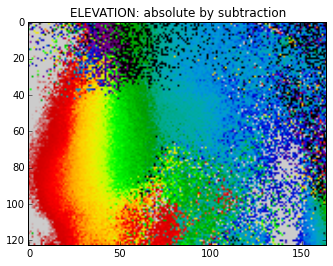

In [285]:
# azimuth_phase = ( np.angle(leftmap) - np.angle(rightmap) ) / 2.
# azimuth_phase = ( np.angle(leftmap / rightmap) ) / 2.
azimuth_phase = np.angle(leftmap) - delay_vert


plt.imshow(azimuth_phase, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('ELEVATION: absolute by subtraction')

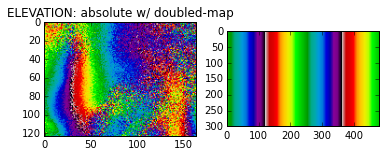

In [286]:
# azimuth_phase = ( np.angle(leftmap) - np.angle(rightmap) ) / 2.
fig = plt.figure()
fig.add_subplot(1,2,1)
azimuth_phase = np.angle(leftmap / rightmap) 
# azimuth_phase = np.angle(rightmap / leftmap) 

plt.imshow(azimuth_phase, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('ELEVATION: absolute w/ doubled-map')

fig.add_subplot(1,2,2)
plt.imshow(double_left_legend, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)


(-0.5, 431.5, 287.5, -0.5)

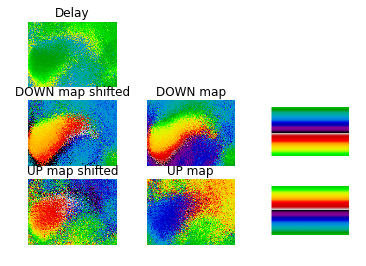

In [287]:
######################################################################
# DELAY HORIZ:
######################################################################

fig = plt.figure()

# 1. Delay map
fig.add_subplot(3,3,1)
# delay_horz = (np.angle(leftmap) + np.angle(rightmap)) / 2.
delay_horz = np.angle(topmap * bottommap) / 2.
# delay_horz = np.angle(upmap * downmap) / 2.
# delay_horz = (np.angle(downmap) + np.angle(upmap)) / 2.
plt.axis('off')

plt.imshow(delay_horz, cmap='spectral',  vmin=-1*math.pi, vmax=1*math.pi)
plt.title("Delay")

# 2. blank

# 3. DOWN-map shifted
fig.add_subplot(3,3,4)
# shift_down = np.angle(downmap.conjugate()) - delay_horz
shift_top = np.angle(topmap) - delay_horz
plt.imshow(shift_top, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('DOWN map shifted')
plt.axis('off')

# 4. DOWN-map relative
ax = fig.add_subplot(3,3,5)
plt.imshow(np.angle(topmap), cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('DOWN map')
plt.axis('off')

# 5.  Down-map LEGEND
ax = fig.add_subplot(3,3,6)
plt.imshow(H_down_legend, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')

# 6. UP-map shifted
fig.add_subplot(3,3,7)
shift_bottom = np.angle(bottommap.conjugate()) - delay_horz
# shift_up = delay_horz - np.angle(upmap.conjugate())
plt.imshow(shift_bottom, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('UP map shifted')
plt.axis('off')

# 7. UP-map relative
ax = fig.add_subplot(3,3,8)
plt.imshow(np.angle(bottommap), cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
# ax.axes.get_xaxis().set_visible(False)
# ax.axes.get_yaxis().set_visible(False)
plt.title('UP map')
plt.axis('off')

# 8. UP-map LEGEND
ax = fig.add_subplot(3,3,9)
plt.imshow(H_up_legend, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
# ax.axes.get_xaxis().set_visible(False)
# ax.axes.get_yaxis().set_visible(False)
plt.axis('off')

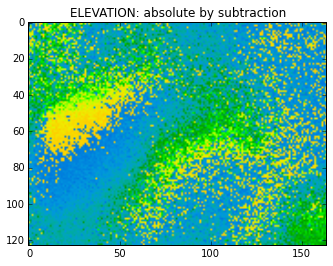

In [288]:
# elevation_phase = ( np.angle(downmap) - np.angle(upmap) ) / 2.
elevation_phase = ( np.angle(topmap / bottommap) ) / 2.

plt.imshow(elevation_phase, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('ELEVATION: absolute by subtraction')

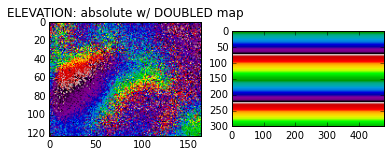

In [289]:
# elevation_phase = ( np.angle(downmap) - np.angle(upmap) ) / 2.
elevation_phase = np.angle(topmap / bottommap)

fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(elevation_phase, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('ELEVATION: absolute w/ DOUBLED map')

fig.add_subplot(1,2,2)
plt.imshow(double_down_legend, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)

In [290]:
#######################################
# Set THRESHOLD params:
#######################################

thresh = 0.3
log_thresh = 0.8
use_log = 1

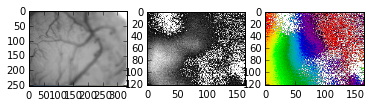

In [329]:

# V-LEFT:
# MASK WITH MAGNITUDE:
# LEFT

curr_key = leftkey

fig = plt.figure()
mag_map = D[curr_key]['mag_map']
phase_map = D[curr_key]['phase_map']

###################################
fig.add_subplot(1,3,1)

plt.imshow(surface, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,2)
if use_log:
    [mx, my] = np.where(np.log(mag_map) >= log_thresh*np.log(mag_map.max()))
else:
    [mx, my] = np.where(mag_map >= thresh*mag_map.max())

mask = np.ones(mag_map.shape) * 100
mask[mx, my] = mag_map[mx, my]
[nullx, nully] = np.where(mask == 100)
mask[nullx, nully] = np.nan
mask = np.ma.array(mask)

plt.imshow(mask, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,3)

phase_mask = np.ones(mag_map.shape) * 100
phase_mask[mx, my] = phase_map[mx, my]
phase_mask[nullx, nully] = np.nan
phase_mask = np.ma.array(phase_mask)
plt.imshow(phase_mask, cmap='spectral', vmin=-1*math.pi, vmax=math.pi)

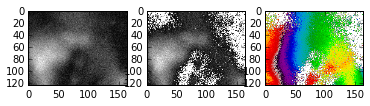

In [292]:
# V-RIGHT:  MASK WITH MAGNITUDE:
# RIGHT 

curr_key = rightkey

fig = plt.figure()
mag_map = D[curr_key]['mag_map']
phase_map = D[curr_key]['phase_map']

###################################
fig.add_subplot(1,3,1)

plt.imshow(mag_map, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,2)
if use_log:
    [mx, my] = np.where(np.log(mag_map) >= log_thresh*np.log(mag_map.max()))
else:
    [mx, my] = np.where(mag_map >= thresh*mag_map.max())

mask = np.ones(mag_map.shape) * 100
mask[mx, my] = mag_map[mx, my]
[nullx, nully] = np.where(mask == 100)
mask[nullx, nully] = np.nan
mask = np.ma.array(mask)

plt.imshow(mask, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,3)

phase_mask = np.ones(mag_map.shape) * 100
phase_mask[mx, my] = phase_map[mx, my]
phase_mask[nullx, nully] = np.nan
phase_mask = np.ma.array(phase_mask)
plt.imshow(phase_mask, cmap='spectral', vmin=-1*math.pi, vmax=math.pi)

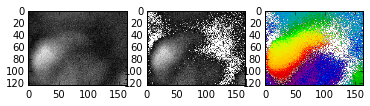

In [293]:
# MASK WITH MAGNITUDE:
# H-TOP: 

curr_key = topkey

fig = plt.figure()
mag_map = D[curr_key]['mag_map']
phase_map = D[curr_key]['phase_map']

###################################
fig.add_subplot(1,3,1)

plt.imshow(mag_map, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,2)
if use_log:
    [mx, my] = np.where(np.log(mag_map) >= log_thresh*np.log(mag_map.max()))
else:
    [mx, my] = np.where(mag_map >= thresh*mag_map.max())

mask = np.ones(mag_map.shape) * 100
mask[mx, my] = mag_map[mx, my]
[nullx, nully] = np.where(mask == 100)
mask[nullx, nully] = np.nan
mask = np.ma.array(mask)

plt.imshow(mask, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,3)

phase_mask = np.ones(mag_map.shape) * 100
phase_mask[mx, my] = phase_map[mx, my]
phase_mask[nullx, nully] = np.nan
phase_mask = np.ma.array(phase_mask)
plt.imshow(phase_mask, cmap='spectral', vmin=-1*math.pi, vmax=math.pi)

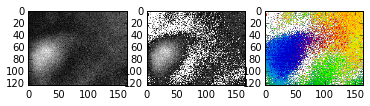

In [294]:
# MASK WITH MAGNITUDE:
# H-BOTTOM: 

curr_key = bottomkey

fig = plt.figure()
mag_map = D[curr_key]['mag_map']
phase_map = D[curr_key]['phase_map']

###################################
fig.add_subplot(1,3,1)

plt.imshow(mag_map, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,2)
if use_log:
    [mx, my] = np.where(np.log(mag_map) >= log_thresh*np.log(mag_map.max()))
else:
    [mx, my] = np.where(mag_map >= thresh*mag_map.max())

mask = np.ones(mag_map.shape) * 100
mask[mx, my] = mag_map[mx, my]
[nullx, nully] = np.where(mask == 100)
mask[nullx, nully] = np.nan
mask = np.ma.array(mask)

plt.imshow(mask, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,3)

phase_mask = np.ones(mag_map.shape) * 100
phase_mask[mx, my] = phase_map[mx, my]
phase_mask[nullx, nully] = np.nan
phase_mask = np.ma.array(phase_mask)
plt.imshow(phase_mask, cmap='spectral', vmin=-1*math.pi, vmax=math.pi)